# 초기 설정 및 라이브러리 불러오기

In [5]:
# 구글 드라이브로부터 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

# 데이터 분석 및 처리 용이
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=120)

# 데이터 스케일링/정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import matplotlib.pyplot as plt

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#
import pickle

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 작업 파일(working directory) 설정

In [6]:
%cd /..
%cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

/
/content/gdrive/MyDrive/hanon_1st


# 데이터 불러오기

excel 파일 검토

excel 파일 현재 directory 넣기



In [7]:
filename='열교환기_data.xlsx'
df = pd.read_excel(filename,engine='openpyxl',sheet_name='Total (2)',header=6,usecols='CN,EQ:FE')
df

,mode,HTR WCC In,HTR WCC flow,LTR WCC In,LTR WCC flow,Cond In Air DB Temp,Cond In Air DB Flow,WCC In P,WCC In T,WCC Out P,WCC Out T,Comp Out Ref Flow.1,HTR WCC Out,LTR WCC Out,dPref WCC,Q_WCC(Ref)
0,blank,-21.250467,4.010612,-21.143801,3.410000,-19.911888,2259.333008,3.089747,-4.182778,0.095366,-26.403755,50.660000,-22.643890,-24.224092,0.196835,2128.835083
1,blank,-21.233246,4.010000,-21.217134,3.400000,-19.939777,2263.858887,3.124635,-4.300556,0.098432,-26.357691,52.296112,-22.615557,-24.215767,0.196152,2200.171197
2,blank,-21.332132,4.000222,-21.233246,3.400000,-19.972445,2259.231445,3.147496,-6.936666,0.092528,-26.508648,52.875557,-22.742222,-24.362843,0.193263,2272.081618
3,blank,-21.148245,4.001945,-21.183802,4.000000,-19.992556,2259.070068,3.046237,-0.665556,0.139020,-25.542418,52.009445,-22.303888,-23.692402,0.162315,2128.897671
4,blank,-21.133245,4.000000,-21.133245,4.000000,-19.985001,2266.379639,3.153850,-0.392778,0.135784,-25.522438,54.898335,-22.201668,-23.692957,0.180754,2242.155843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,AC+Battery Cooling,67.709999,12.042167,68.381111,15.400000,53.846832,2283.807373,20.980852,93.503891,20.692310,71.172691,180.726669,70.018890,70.358543,0.253763,-6324.230897
2281,AC+Battery Cooling,67.666664,11.930278,68.471664,15.400000,53.998554,2284.353271,21.062258,93.876671,20.743570,71.290909,187.924438,70.096107,70.512840,0.276194,-6583.712625
2282,AC+Battery Cooling,68.051666,12.024722,68.944443,15.400000,53.963722,2285.270752,21.313335,94.561668,20.958376,71.793167,198.607773,70.573891,71.025101,0.303843,-6935.286599
2283,AC+Battery Cooling,68.625557,11.976556,69.570000,15.400000,53.990780,2286.748291,21.680365,96.405556,21.287907,72.505219,210.104446,71.303894,71.756592,0.332775,-7369.921512


In [8]:
# 원하는 mode 선택
select_mode=['CND Only','CND Only 난방','직렬 난방']
select_mode_index=pd.Series(np.full(df.shape[0],False))
for i in range(len(select_mode)):
    select_mode_index+=df[df.columns[0]].str.contains(select_mode[i])

df=df[select_mode_index]
df

,mode,HTR WCC In,HTR WCC flow,LTR WCC In,LTR WCC flow,Cond In Air DB Temp,Cond In Air DB Flow,WCC In P,WCC In T,WCC Out P,WCC Out T,Comp Out Ref Flow.1,HTR WCC Out,LTR WCC Out,dPref WCC,Q_WCC(Ref)
14,직렬 난방,-21.433245,4.000000,-21.433245,3.900000,-19.985388,2256.960205,3.314390,-7.794445,0.092074,-26.497547,51.200001,-22.866110,-24.292358,0.193831,2215.564263
15,직렬 난방,-21.533245,3.999611,-21.433245,3.900000,-19.986334,2257.729004,3.841847,-10.942223,0.087135,-26.621309,50.558887,-23.143333,-24.393368,0.187254,2241.870583
16,직렬 난방,-21.562134,3.999444,-21.443245,3.900000,-19.985777,2256.529785,4.358129,-11.090000,0.085432,-26.642399,49.275002,-23.188889,-24.395588,0.185610,2187.098388
17,직렬 난방,-21.633244,4.000000,-21.533245,3.800000,-19.949945,2256.069824,4.534723,-2.821111,0.040870,-27.567562,64.681107,-23.000555,-24.493269,0.275668,2671.990263
18,직렬 난방,-21.633244,4.000000,-21.533245,3.800000,-19.919222,2257.485840,4.179265,-3.677778,0.040870,-27.619730,64.714447,-23.077778,-24.492159,0.274533,2692.404704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,CND Only 난방,-6.833259,5.205111,-9.033257,9.200000,-10.003222,2260.416016,6.050609,25.393888,-0.016521,-9.205863,24.086666,-8.183888,-9.004313,0.152607,846.473724
1713,직렬 난방,-5.723816,5.373389,-7.111593,9.900000,-9.946555,2264.312744,8.447424,35.093887,1.528896,-6.154553,35.906666,-5.793889,-6.174365,0.070035,1113.328595
1714,직렬 난방,-5.444372,5.398445,-6.933259,9.900000,-9.962722,2262.361816,8.480439,35.295555,1.545869,-5.933114,37.796665,-5.515000,-5.937380,0.077398,1170.508246
1715,직렬 난방,-5.333261,5.415667,-6.878260,9.907778,-10.007334,2261.687500,8.475163,35.319443,1.553135,-5.842651,38.428333,-5.431667,-5.902415,0.080741,1190.368298


# input - output 설정

In [9]:
for i in range(df.shape[1]):
    print(i, df.columns[i])

0 mode
1 HTR WCC In
2 HTR WCC flow
3 LTR WCC In
4 LTR WCC flow
5 Cond In Air DB Temp
6 Cond In Air DB Flow
7 WCC In P
8 WCC In T
9 WCC Out P
10 WCC Out T
11 Comp Out Ref Flow.1
12 HTR WCC Out
13 LTR WCC Out
14 dPref WCC
15 Q_WCC(Ref)


In [10]:
select_input=[1,2,3,4,5,6,7,8,9,10]
select_output=[12]

In [11]:
selected_col_name=df.columns[select_input]
input_pd=df[selected_col_name]
input_np=input_pd.to_numpy()
input_pd

,HTR WCC In,HTR WCC flow,LTR WCC In,LTR WCC flow,Cond In Air DB Temp,Cond In Air DB Flow,WCC In P,WCC In T,WCC Out P,WCC Out T
14,-21.433245,4.000000,-21.433245,3.900000,-19.985388,2256.960205,3.314390,-7.794445,0.092074,-26.497547
15,-21.533245,3.999611,-21.433245,3.900000,-19.986334,2257.729004,3.841847,-10.942223,0.087135,-26.621309
16,-21.562134,3.999444,-21.443245,3.900000,-19.985777,2256.529785,4.358129,-11.090000,0.085432,-26.642399
17,-21.633244,4.000000,-21.533245,3.800000,-19.949945,2256.069824,4.534723,-2.821111,0.040870,-27.567562
18,-21.633244,4.000000,-21.533245,3.800000,-19.919222,2257.485840,4.179265,-3.677778,0.040870,-27.619730
...,...,...,...,...,...,...,...,...,...,...
1712,-6.833259,5.205111,-9.033257,9.200000,-10.003222,2260.416016,6.050609,25.393888,-0.016521,-9.205863
1713,-5.723816,5.373389,-7.111593,9.900000,-9.946555,2264.312744,8.447424,35.093887,1.528896,-6.154553
1714,-5.444372,5.398445,-6.933259,9.900000,-9.962722,2262.361816,8.480439,35.295555,1.545869,-5.933114
1715,-5.333261,5.415667,-6.878260,9.907778,-10.007334,2261.687500,8.475163,35.319443,1.553135,-5.842651


In [12]:
selected_col_name=df.columns[select_output]
output_pd=df[selected_col_name]
output_np=output_pd.to_numpy()

# Additional input

In [13]:
df.dtypes

mode                    object
HTR WCC In             float64
HTR WCC flow           float64
LTR WCC In             float64
LTR WCC flow           float64
Cond In Air DB Temp    float64
Cond In Air DB Flow    float64
WCC In P               float64
WCC In T               float64
WCC Out P              float64
WCC Out T              float64
Comp Out Ref Flow.1    float64
HTR WCC Out            float64
LTR WCC Out            float64
dPref WCC              float64
Q_WCC(Ref)             float64
dtype: object

![Slide11](https://github.com/woooky/jinwook/assets/84065529/df7ffe4a-ed78-421c-bcd7-4e57a68274d3)

In [14]:
df_mode=pd.get_dummies(df['mode'])
df_mode

,CND Only,CND Only 난방,직렬 난방
14,0,0,1
15,0,0,1
16,0,0,1
17,0,0,1
18,0,0,1
...,...,...,...
1712,0,1,0
1713,0,0,1
1714,0,0,1
1715,0,0,1


In [15]:
input_np_mode=df_mode.to_numpy()

# 데이터 스케일링/정규화:
특성별로 값의 범위가 다 다르기 때문에 어떤 특성은 값이 너무 작고 어떤 특성은 값이 너무 크다면 알고리즘 학습 시 0으로 수렴하거나 무한으로 발산해버리면서 원하는 결과값이 나오지 않을 수 있다.

StandardScaler
: 평균=0, 표준편차=1로 조정해서 모든 특성이 같은 크기를 갖게 한다.

MinMaxScaler
: 최대값=1, 최소값=0으로 조정, 아웃라이어에 취약

RobustScaler
: 중앙값=0, IQR(1분위~3분위값)=1로 조정, 아웃라이어 영향을 최소화하며 정규분포보다 더 넓게 분포

MaxAbsScaler
: 0을 기준으로 절대값이 가장 큰 수가 1 또는 -1이 되도록 조정, 양수 데이터로만 구성된 데이터에서는 아웃라이어에 민감

In [16]:
# 스케일러 선택
scaler_X=StandardScaler()

# 스케일링 학습
scaler_X.fit(input_np)

# 스케일링
X_scaled = scaler_X.transform(input_np)

print(X_scaled.shape)
X_scaled

(525, 10)


array([[-1.25943068, -0.72054369, -1.10691166, ..., -1.66548229, -0.97804137, -1.35296896],
       [-1.27010432, -0.72076076, -1.10691166, ..., -1.86511467, -0.98325013, -1.3647593 ],
       [-1.27318778, -0.72085378, -1.10796458, ..., -1.87448674, -0.98504626, -1.36676842],
       ...,
       [ 0.4471567 ,  0.06006587,  0.41978673, ...,  1.06728956,  0.55525193,  0.60612404],
       [ 0.45901626,  0.06967912,  0.42557764, ...,  1.06880452,  0.56291531,  0.61474206],
       [ 0.46109168,  0.05420455,  0.43341585, ...,  1.07243369,  0.57369208,  0.62425889]])

In [17]:
# 기존 input과 추가 input 합쳐주기
X_scaled=np.concatenate((X_scaled,input_np_mode),axis=1)
print(X_scaled.shape)
X_scaled

(525, 13)


array([[-1.25943068, -0.72054369, -1.10691166, ...,  0.        ,  0.        ,  1.        ],
       [-1.27010432, -0.72076076, -1.10691166, ...,  0.        ,  0.        ,  1.        ],
       [-1.27318778, -0.72085378, -1.10796458, ...,  0.        ,  0.        ,  1.        ],
       ...,
       [ 0.4471567 ,  0.06006587,  0.41978673, ...,  0.        ,  0.        ,  1.        ],
       [ 0.45901626,  0.06967912,  0.42557764, ...,  0.        ,  0.        ,  1.        ],
       [ 0.46109168,  0.05420455,  0.43341585, ...,  0.        ,  0.        ,  1.        ]])

In [18]:
# output 데이터에 대한 스케일링
scaler_Y=StandardScaler()
scaler_Y.fit(output_np)
Y_scaled = scaler_Y.transform(output_np)

(array([261.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 264.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

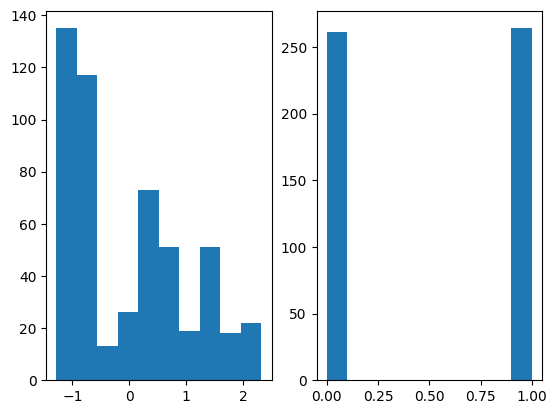

In [19]:
plt.subplot(1,2,1)
plt.hist(X_scaled[:,0])
plt.subplot(1,2,2)
plt.hist(X_scaled[:,-1])

# 최종 준비 데이터

입력 데이터 : X_scaled,

출력 데이터 : Y_scaled

스케일링 정보 : scaler_X, scaler_Y

In [21]:
with open("Heat_Exchanger_pp.pkl", "wb") as file:
    pickle.dump((X_scaled, Y_scaled, scaler_X, scaler_Y), file)